# Polyhedrons 📐

A polyhedron is just a set defined by a set of linear inequalities. Namely let a matrix $D$ and a vector $b$, then a polyhedron $\mathcal{H}$ is defined by the set of linear inequalities 
$$
\mathcal{H} = \{ x \mid Dx \leq b \}
$$

If you know the matrices that define your polyhedron it is very easy to construct a polyhedron in code 

In [2]:
from stl_tool.polyhedron import Polyhedron
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

A = np.vstack((-np.random.rand(5, 2), np.random.rand(5, 2)))
b = np.random.rand(10)
H = Polyhedron(A,b)

You can see the set of inequalities defining your polyhedron.

In [3]:
print(H)

Hyperplane representation of polytope
  [[-0.65359  -0.11501] |    [0.02898]
   [-0.95028  -0.48219] |    [0.98203]
   [-0.87247  -0.21233] |    [0.33964]
   [-0.04071  -0.39719] |    [0.70669]
   [-0.23313  -0.84174] |    [0.36188]
   [ 0.20708   0.74247] |    [0.03511]
   [ 0.39215   0.18226] |    [0.85506]
   [ 0.74354   0.06958] |    [0.65725]
   [ 0.88534   0.95264] |    [0.76568]
   [ 0.93114   0.41543] x <= [0.55409]



And you can also print it!

<Axes: xlabel='X', ylabel='Y'>

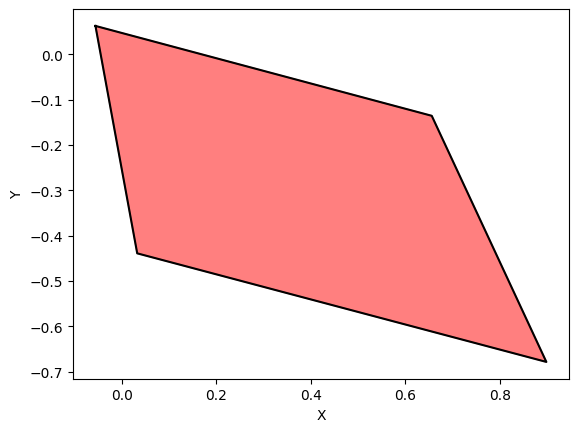

In [4]:
H.plot(color="red", alpha=0.5)

It is good to ask if you are dealing with a general polyhedron or with a polytope (i.e. a closed polyhedron).

In [5]:
print(H.is_open) # -> This one is a polytope because it is closed

False


Without delving into details, it is good to remember that a polyhedron can be described in two distint representations. An H-representation defined by the matrices $D$ and vector $b$ as we gave just above, and a V-representation given in terms of the vertices of the polyhedrons (and its rays if the polyhedron is open). We can get the vertices of the polytope by calling for the vertices.

In [6]:
print(H.vertices) #-> four vertices 

[[ 0.03291033 -0.43903011]
 [-0.05538016  0.0627287 ]
 [ 0.65553863 -0.13555381]
 [ 0.89780882 -0.67857619]]


Once you know the vertices of a polytope you can obtain any point inside of it as a convex combination of its vertices. Namely, let a set of coefficients $\lambda_i \geq 0 $ such that $\sum_i \lambda_i =1$. This is called a convex combination of coefficients. Then every point inside the polytope can be described as the following weighted sum
$$
x = \sum_i \lambda_i v_i
$$

where $v_i$ are the vertices of the polytope! We call all such convex combinations the convex hull of the polytopes (which is the polytope itself) and it is denoted as $conv(v_i)$ where

$$
\text{conv}(v_1, \dots, v_m) = \left\{ \sum_{i=1}^m \lambda_i v_i \;:\; \lambda_i \geq 0,\; \sum_{i=1}^m \lambda_i = 1 \right\}
$$



Let's print the vertices ...

[ 0.03291033 -0.43903011]
[-0.05538016  0.0627287 ]
[ 0.65553863 -0.13555381]
[ 0.89780882 -0.67857619]


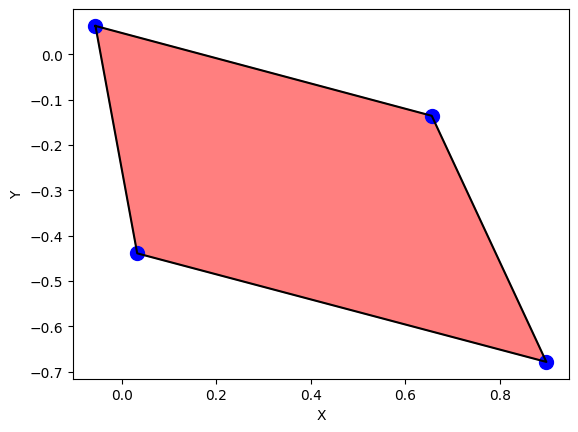

In [7]:
H.plot(color="red", alpha=0.5)
ax = plt.gca()
for v in H.vertices:
    print(v)
    ax.scatter([v[0]], [v[1]], c='blue',s=100)

If we take a random convex combiination of them, the resulting point will be inside the polytope.

[ 0.03291033 -0.43903011]
[-0.05538016  0.0627287 ]
[ 0.65553863 -0.13555381]
[ 0.89780882 -0.67857619]


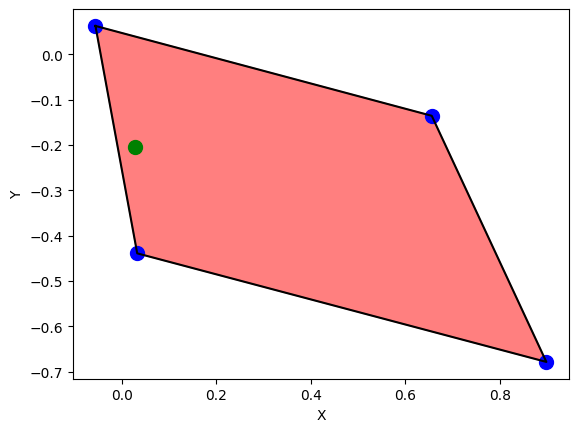

In [8]:
H.plot(color="red", alpha=0.5)
ax = plt.gca()
for v in H.vertices:
    print(v)
    ax.scatter([v[0]], [v[1]], c='blue',s=100)

lambda_vec = np.random.rand(len(H.vertices))
lambda_vec = lambda_vec/np.sum(lambda_vec)

random_point = np.sum(lambda_vec[np.newaxis]*H.vertices.T,1)
ax.scatter([random_point[0]], [random_point[1]], c='green',s=100)

When the polyhedron is open, the you will also have a set of directions where your polyhedron extends infinitely. Indeed a general polyhedron is defined as the Minkowky sum of polytope and a cone. A cone is defined by a set of rays $r_j$ and all their linear combinations as 

$$
\text{cone}(r_1, \dots, r_k) = \left\{ \sum_{i=1}^k \lambda_i r_i \;:\; \lambda_i \geq 0 \right\}
$$

and a genral polyhedron is thus defined generally as 

$$
\mathcal{H} = \text{conv}(\{v_i\}) + \text{cone}(\{r_j\})
$$

We next check an open polyhedron for his rays

In [9]:
np.random.seed(1000)
A = np.random.rand(5, 2)
b = np.random.rand(5)
H = Polyhedron(A,b)

print(H)
print("this are the rays : directions where the polytope extends infinitely")
print(H.rays)
print("This are the vertices")
print(H.vertices)
print(H.is_open)

Hyperplane representation of polytope
  [[0.65359  0.11501] |    [0.20708]
   [0.95028  0.48219] |    [0.74247]
   [0.87247  0.21233] |    [0.39215]
   [0.04071  0.39719] |    [0.18226]
   [0.23313  0.84174] x <= [0.74354]

this are the rays : directions where the polytope extends infinitely
[[ 1.         -5.68304459]
 [-9.75677039  1.        ]]
This are the vertices
[[0.2404328  0.43421701]]
True
